# Cvičení 2 - Diskrétní náhodná veličina
## Michal Béreš, Adéla Vrtková, Martina Litschmannová
---

### Náhodná veličina
Náhodná veličina je funkce, která každému elementárnímu jevu přiřazuje reálné číslo.

### Diskrétní náhodná veličina
Diskrétní náhodná veličina nabývá konečně nebo spočetně mnoha hodnot.

### Pravděpodobnostní funkce
Pravděpodobnostní funkce je funkce, která každé hodnotě náhodné veličiny přiřazuje pravděpodobnost, že náhodná veličina nabývá této hodnoty.
- $P(X = x) = p(x)$

### Distribuční funkce
Distribuční funkce je funkce, která každému reálnému číslu přiřazuje pravděpodobnost, že náhodná veličina nabývá hodnoty menší než toto číslo.
- $F(x) = P(X < x)$

### Očekávaná hodnota
Očekávaná hodnota (anglicky expected value) je vážený průměr hodnot, které může náhodná veličina nabývat.
- Přímo pro $X$ se nazývá střední hodnota: $$E(X) = \sum_{i=1}^{n} x_i \cdot p(x_i)$$
- V jejím argumentu může být libovolná funkce nad hodnotami náhodné veličiny: $$E(g(X)) = \sum_{i=1}^{n} g(x_i) \cdot p(x_i)$$
- Takovéto zajímavé funkce jsou například momenty. **obecný moment:** $$E(X^k) = \sum_{i=1}^{n} x_i^k \cdot p(x_i)$$ a **centrální moment:** $$E((X - E(X))^k) = \sum_{i=1}^{n} (x_i - E(X))^k \cdot p(x_i)$$
- První zajímavý centrální moment je rozptyl: $$D(X) = E((X - E(X))^2) = E(X^2) - E(X)^2$$

### Další důležité číselné charakteristiky
- **Modus** $\hat{x}$ je hodnota, která má největší pravděpodobnost.
- **Směrodatná odchylka** $\sigma = \sqrt{D(X)}$ je odmocnina z rozptylu.
---

# Příklady
## Příklad 1.
Majitel servisního střediska nabídl prodejně automobilů, která si zřídila autopůjčovnu své
služby. Za každý automobil zapůjčený jeho prostřednictvím obdrží od autopůjčovny 500,- Kč.
Zároveň se však zavázal, že každý den investuje do údržby zapůjčených automobilů 800,- Kč.
Počet automobilů zapůjčených prostřednictvím servisního střediska za 1 den je popsán následující pravděpodobnostní funkcí:
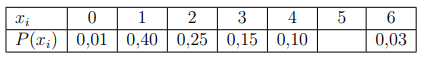


**1. a)**  Hodnota pravděpodobnostní funkce pro 5 automobilů byla špatně čitelná. Určete ji:

In [1]:
x <- c(0, 1, 2, 3, 4, 5, 6)
p <- c(0.01, 0.40, 0.25, 0.15, 0.10, 0, 0.03)
1 - sum(p) # počítačová aritmetika zde může zlobit
round(1 - sum(p), digits = 2) # zaokrouhlíme na setiny
p[6] <- round(1 - sum(p), digits = 2) # zápis pro x=5 je 6-tá pozice
p


[1] 0.06

[1] 0.06

[1] 0.01 0.40 0.25 0.15 0.10 0.06 0.03

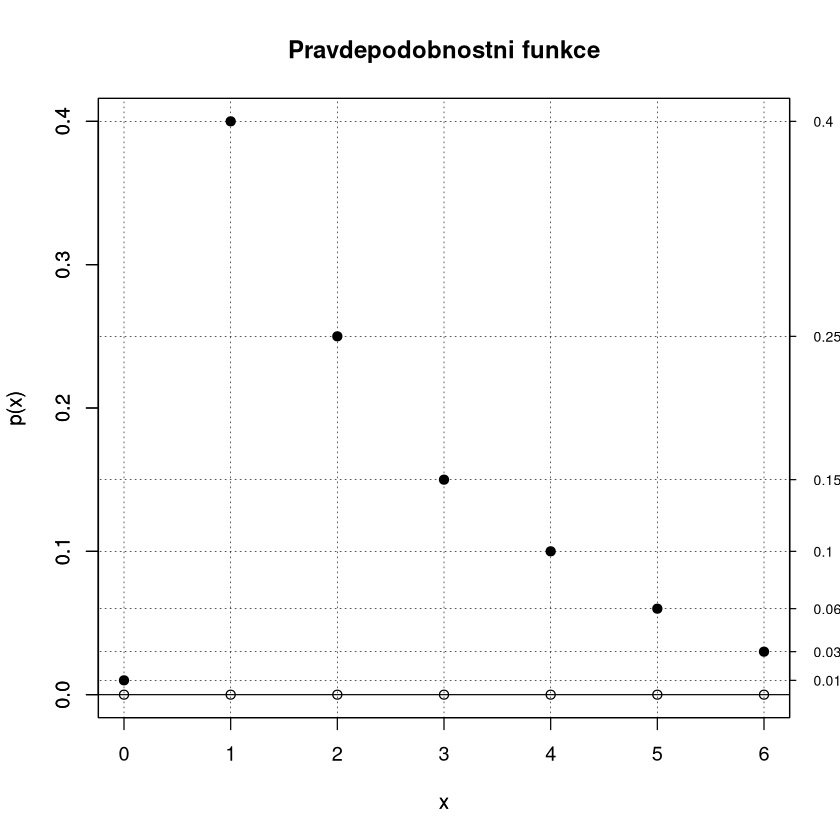

In [2]:
# Pravděpodobnostní funkce
pravd.f <- function(x, p) {
    plot(x, p, # plná kolečka - v skutečných hodnotách
        ylab = "p(x)", xaxt = "n", pch = 19, ylim = c(0, max(p)), main = "Pravdepodobnostni funkce"
    )
    lines(c(min(x) - 100, max(x) + 100), c(0, 0))
    for (i in seq_along(x)) {
        lines(c(min(x) - 100, max(x) + 100), c(p[i], p[i]),
            type = "l", lty = 3, lwd = 0.5
        ) # horizontální grid
        lines(c(x[i], x[i]), c(-0.1, 1.1),
            type = "l", lty = 3, lwd = 0.5
        ) # vertikální grid
    }
    par(new = TRUE) # že chceme kreslit do jednoho grafu
    plot(x, p * 0, # prázdná kolečka - tam kde je definovaná nenulová hodnota
        ylab = "p(x)", xaxt = "n", ylim = c(0, max(p))
    )
    axis(1, at = x, labels = x) # nastavení hodnot na X
    axis(4, at = p, labels = p, las = 2, cex.axis = 0.7, tck = -.01) # a Y
}

pravd.f(x, p)

**1. b)**
Určete a zakreslete distribuční funkci náhodné veličiny X, která je definována jako počet
zapůjčených automobilů.

In [3]:
p
# cumulative sum
F_x <- cumsum(p)
F_x


[1] 0.01 0.40 0.25 0.15 0.10 0.06 0.03

[1] 0.01 0.41 0.66 0.81 0.91 0.97 1.00

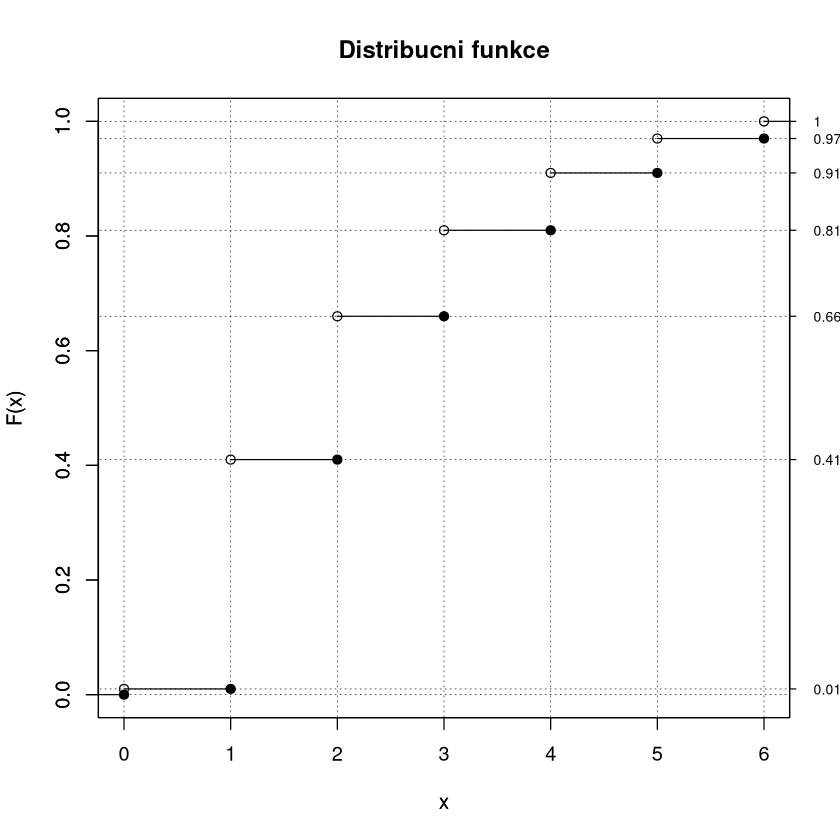

In [4]:
# Funkce pro výpočet a vykreslení distribuční funkce
dist.f <- function(x, p) {
    F_x <- cumsum(p)
    F_ext <- c(0, F_x) # natáhneme F o 0 na začátku
    length_int <- max(x) - min(x)
    x_ext <- c(x[1] - 0.1 * length_int, x, x[length(x)] + 0.1 * length_int) # a x z obou stran


    plot(x, F_x,
        ylab = "F(x)", xaxt = "n", ylim = c(0, 1), # prazdná kolečka
        type = "p", main = "Distribucni funkce"
    )
    par(new = TRUE) # že chceme kreslit do jednoho grafu
    plot(x, F_ext[1:(length(F_ext) - 1)], # plná kolečka
        ylab = "F(x)", xaxt = "n", ylim = c(0, 1), type = "p", pch = 19
    )

    for (i in 1:(length(x_ext) - 1)) {
        lines(c(min(x) - 0.1 * length_int, max(x) + 0.1 * length_int),
            c(F_ext[i], F_ext[i]),
            type = "l", lty = 3, lwd = 0.5
        ) # horizontální grid
        lines(c(x_ext[i], x_ext[i]), c(-0.1, 1.1),
            type = "l", lty = 3, lwd = 0.5
        ) # vertikální grid
        lines(x_ext[i:(i + 1)], c(F_ext[i], F_ext[i])) # graf - čáry
    }
    axis(1, at = x, labels = x) # nastavení hodnot na X
    axis(4, at = F_x, labels = F_x, las = 2, cex.axis = 0.7, tck = -.01) # a Y
}

dist.f(x, p)


**1. c)** 
Určete střední hodnotu, rozptyl, směrodatnou odchylku a modus počtu zapůjčených automobilů během jednoho dne.

In [5]:
# Střední hodnota
x * p
EX <- sum(x * p)
EX


[1] 0.00 0.40 0.50 0.45 0.40 0.30 0.18

[1] 2.23

In [7]:
# Rozptyl
EX2 <- sum(x * x * p) # druhý obecný moment
EX2
DX <- EX2 - EX^2
DX



[1] 6.93

[1] 1.9571

In [8]:
# Směrodatná odchylka
sigma.X <- sqrt(DX)
sigma.X


[1] 1.398964

In [10]:
# modus
x[which.max(p)]


[1] 1

**1. d)**
Určete pravděpodobnostní funkci a distribuční funkci náhodné veličiny $Z$, která je definována jako zisk majitele servisu.

In [11]:
z <- 500 * x - 800
z



[1] -800 -300  200  700 1200 1700 2200

In [ ]:
pravd.f(z, p)


In [ ]:
# Distribuční funkce
dist.f(z, p)


**1. e)** 
Určete střední hodnotu, směrodatnou odchylku a modus zisku majitele servisu ze zapůjčených automobilů během jednoho dne.

In [12]:
# použijeme vzorec pro střední hodnotu a rozptyl
# E(aX + b) = aE(X) + b
# D(aX + b) = a^2D(X)

EZ <- 500 * EX - 800
EZ

DZ <- 500^2 * DX
DZ

sigma.Z <- sqrt(DZ)
sigma.Z

# modus
z[which.max(p)]


[1] 315

[1] 489275

[1] 699.482

[1] -300

**1. f)**
Určete pravděpodobnost, že v daný den nebude majitel autoservisu prodělávat (kladný zisk).

In [17]:
# příjem převýší výdaje, když je zisk kladný
p
z > 0
sum(p[z > 0])

[1] 0.01 0.40 0.25 0.15 0.10 0.06 0.03

[1] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

[1] 0.59

## Příklad č. 2
Pro distribuční funkci náhodné veličiny $X$ platí:

$F(x)=\begin{cases}
0   &      x \leq -1 \\
0.3 & -1 < x \leq  0 \\
0.7 &  0 < x \leq  1 \\
1   & 1 < x
\end{cases}$

**2. a)** 
Určete pravděpodobnostní funkci náhodné veličiny $X$, její střední hodnotu a směrodatnou odchylku.

In [18]:
F_x <- c(0, 0.3, 0.7, 1)
F_x
x <- c(-1, 0, 1)
x


[1] 0.0 0.3 0.7 1.0

[1] -1  0  1

In [19]:
p <- diff(F_x)
x
p


[1] -1  0  1

[1] 0.3 0.4 0.3

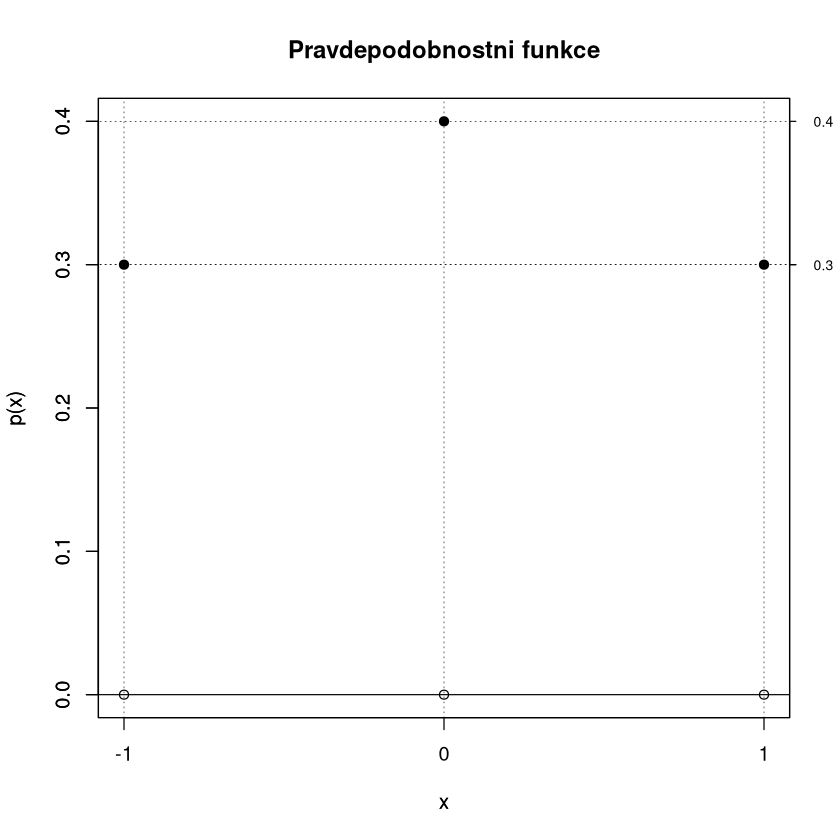

In [20]:
pravd.f(x, p)


In [ ]:
dist.f(x, p)


In [ ]:
# střední hodnota
EX <- sum(x * p)
EX
# rozptyl
EX2 <- sum(x * x * p)
DX <- EX2 - EX^2
DX
# směrodatná odchylka
sigma.X <- sqrt(DX)
sigma.X

**2. b)**
Náhodná veličina $Y = 1 − 3X$, určete $P(y), F(y), E(Y), D(Y)$.

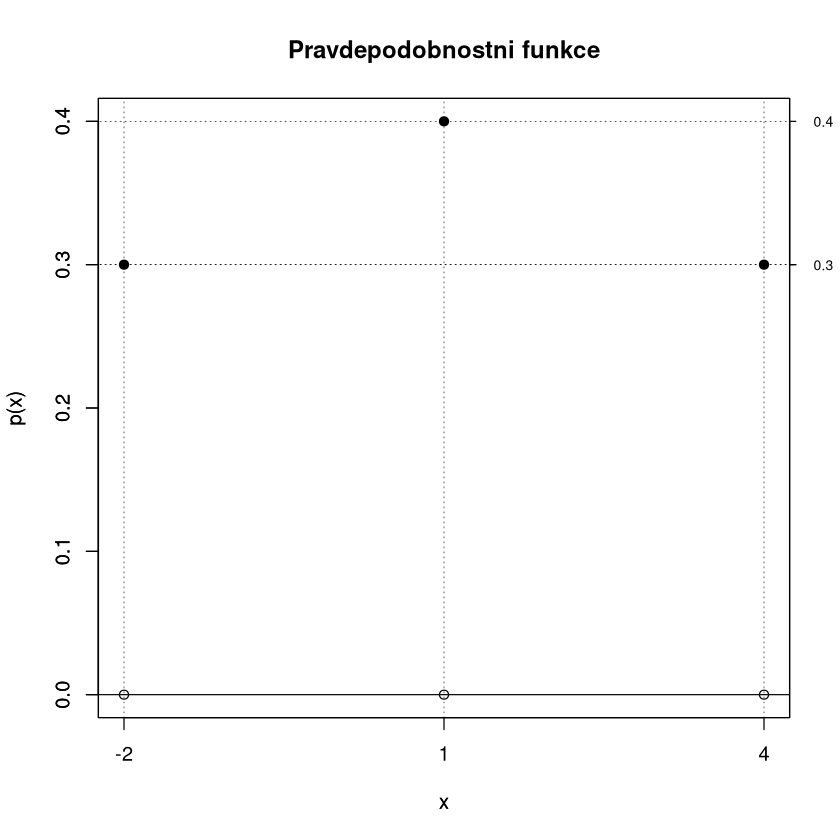

In [21]:
y <- 1 - 3 * x
pravd.f(y, p)


[1]  4  1 -2

[1] 0.3 0.4 0.3

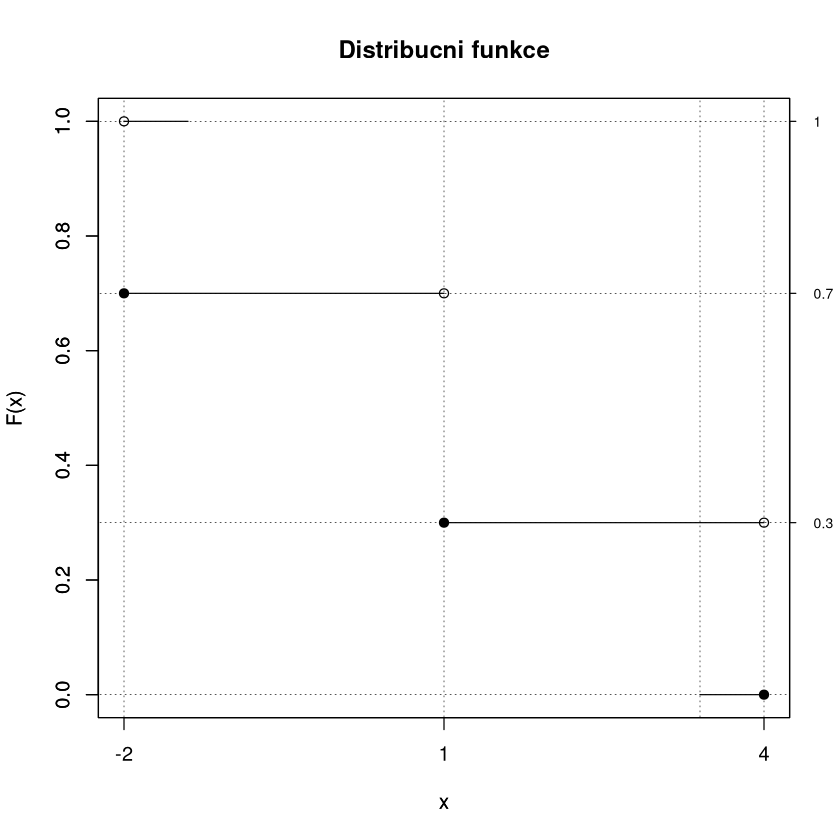

In [22]:
dist.f(y, p) # Nesmyslný výstup - čím je to způsobeno?
y
p


In [23]:
y
sort(y)
idx_sorted <- order(y) # funkce order vrátí indexy setřízeného pořadí
idx_sorted
y <- y[idx_sorted]
p_y <- p[idx_sorted]
p_y


[1]  4  1 -2

[1] -2  1  4

[1] 3 2 1

[1] 0.3 0.4 0.3

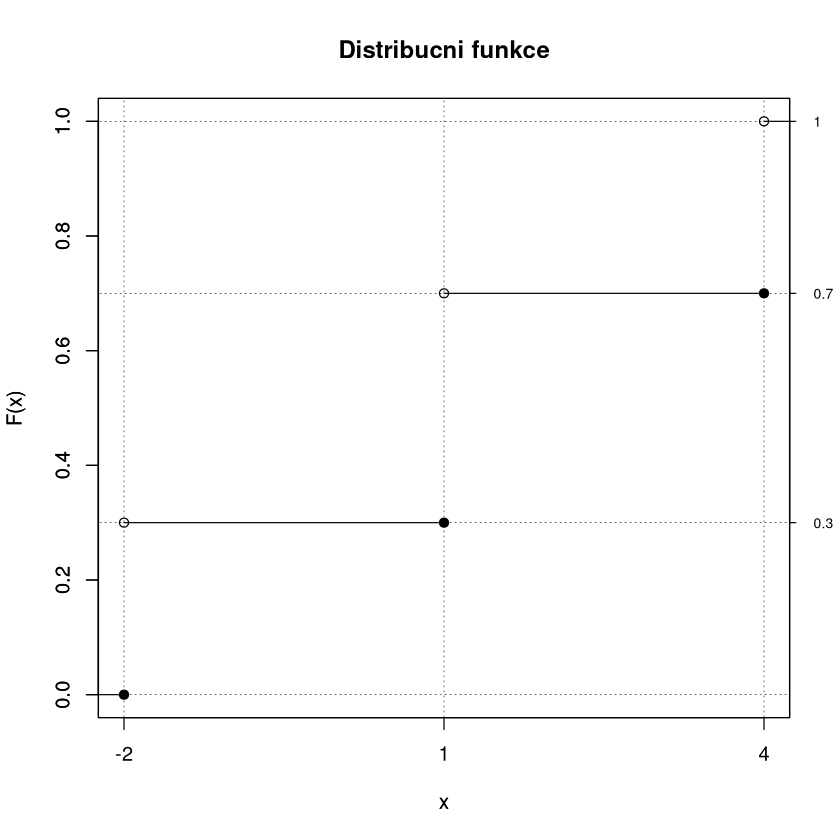

In [24]:
dist.f(y, p_y)


In [ ]:
# zde stále můžeme použít vzorec pro střední hodnotu a rozptyl
# E(aX + b) = aE(X) + b
# D(aX + b) = a^2D(X)

EY <- 1 - 3 * EX
EY

DY <- 3^2 * DX
DY

sigma.Y <- sqrt(DY)
sigma.Y

**2. c)** 
Náhodná veličina $W = 3X^2$, určete $P(w), F(w), E(W), D(W)$.

In [ ]:
w <- 3 * x * x
w


In [ ]:
pravd.f(w, p)
dist.f(w, p)


In [ ]:
# distribuční funkce opět vypadá rozbitě, máme duplicitní hodnoty ve w

w
w_uniq <- unique(w)
w_uniq
w_sorted <- sort(w_uniq)
w_sorted


In [ ]:
# ale jak se změní pravděpodobnosti?
p_w <- w_sorted * 0 # inicializace pole o stejné velikosti
for (i in seq_along(w_sorted)) {
    p_w[i] <- sum(p[w == w_sorted[i]])
}
p_w


In [ ]:
pravd.f(w_sorted, p_w)
dist.f(w_sorted, p_w)


In [ ]:
# charakteristiky

EW <- sum(w_sorted * p_w)
EW

DW <- sum(w_sorted * w_sorted * p_w) - EW^2
DW

sigma.W <- sqrt(DW)
sigma.W


## Příklad 3.
V dílně jsou dva stroje pracující nezávisle na sobě. Pravděpodobnost poruchy prvního stroje
je 0,2, pravděpodobnost poruchy druhého stroje je 0,3. Náhodná veličina $X$ je definována jako
počet současně porouchaných strojů. Určete:

**3. a)** 
pravděpodobnostní funkci náhodné veličiny $X$,

In [ ]:
x <- c(0, 1, 2)
x
p1 <- 0.2
p2 <- 0.3


In [ ]:
p <- x * 0
# spočteme jednotlivé pravděpodobnosti počtu porouchaných strojů
p[1] <- (1 - p1) * (1 - p2) # 0 porouchaných tedy oba v provozu
p[3] <- p1 * p2 # 2 tedy porouchané oba
p
1 - sum(p)
p[2] <- (1 - p1) * p2 + p1 * (1 - p2) # právě jeden - buď první nebo druhý
p


In [ ]:
sum(p)


In [ ]:
pravd.f(x, p)


**3. b)**
distribuční funkci náhodné veličiny $X$,

In [ ]:
dist.f(x, p)


**3. c)**
střední hodnotu a rozptyl náhodné veličiny $X$.

In [ ]:
# charakteristiky
EX <- sum(x * p)
EX

EX2 <- sum(x * x * p)
DX <- EX2 - EX^2
DX

sigma.X <- sqrt(DX)
sigma.X
